In [2]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)
import os
os.getcwd()

'C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP'

In [3]:
# get FITS capabilities
from astropy.io import fits
# get tar working lib
import tarfile

In [3]:
# make the paths
master_path='D:\\GALPROP\\runs_L_D\\'
L_val=10
D_val=3
extension1='L_'+str(L_val)+'_D_'+str(D_val)
extension2='\\nuclei_full_56_'+extension1
image_file2= master_path+extension1+extension2

In [10]:
tar = tarfile.open("C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP\\sample.tar.gz")
tarfile.is_tarfile("sample.tar.gz")
#Tarfile.getmembers("sample.tar.gz")
tar.getnames()[0]

'nuclei_full_56_L_8_D_12'

In [11]:
#open a tar file:
tar = tarfile.open("C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP\\sample.tar.gz")
tar.extractall(path=str(os.getcwd())) # for the curr working dir.
tar.close()

In [ ]:
# create a new tar file, I don't need this I do not think.
tar = tarfile.open("sample.tar.gz", "w|gz")
tar.add(image_file2, arcname='nuclei_full_56_'+extension1)
tar.close()

In [4]:
os.getcwd()

'C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP'

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '1911_03108_b_c_ratio.PNG',
 '1911_03108_b_c_ratio_p_i_scenarios.PNG',
 '1911_03108_li_p_i_scenario.PNG',
 '1911_03108_nitrogen_boron_be_spectra.PNG',
 'AMS_Data',
 'ams_he3_he4_copied_table.docx',
 'Bery_flux_ams.xlsx',
 'be_ratio.png',
 'be_ratio_L_D_extremes.png',
 'be_ratio_multiple.png',
 'be_ratio_multiple_halo_sizes.png',
 'be_ratio_multiple_halo_sizes_d_12.png',
 'be_ratio_tarfile_test.png',
 'Boron_flux_ams.csv',
 'Boron_flux_ams.xlsx',
 'Boron_flux_ams_data.png',
 'boschini_table1_injection_spectra.PNG',
 'boschini_table2_best_fit_params.PNG',
 'B_C_ams_data.csv',
 'B_C_ams_data.png',
 'B_C_ams_data.xlsx',
 'B_C_ratio_log_AMS_data.png',
 'B_C_ratio_log_AMS_data_weird_scale.png',
 'B_O_ams_data.png',
 'CCfits-2.5.pdf',
 'cfitsio.pdf',
 'Compare Helium and Beryllium.ipynb',
 'Compare Models L and D.ipynb',
 'distmask.gif',
 'exportP1.png',
 'fitsio.pdf',
 'FITS_images-3d_only.ipynb',
 'FITS_images.ipynb',
 'Fit_spectra_from_simulation.ipynb',
 'fpackguid

In [8]:
tar = tarfile.open("C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP\\sample.tar.gz")
if tarfile.is_tarfile("sample.tar.gz"): 
    image_file=tar.getnames()[0]
    image_data = fits.getdata(image_file)
    print(type(image_data))
    print(image_data.shape)
else:
    print("ERR")
# should then be [element,energy, z, y, x]

<class 'numpy.ndarray'>
(94, 24, 41, 29, 32)


In [4]:
image_data2 = fits.getdata(image_file2)
print(type(image_data2))
print(image_data2.shape)

<class 'numpy.ndarray'>
(94, 24, 41, 29, 32)


In [5]:
def undo_log_energy(energy):
    i=0
    while i<len(energy):
        energy[i]=10**(energy[i]+2)
        i+=1

In [8]:
energy=np.arange(0,7,0.304347391792257)
undo_log_energy(energy)

In [46]:
#these are at the position of earth we expect.
x_loc=24
y_loc=22
z_loc=40 #40th for the highest halo size of 4, 30th for halo size of 3

be_10_be_9_2=np.divide(image_data2[16,:,20,y_loc,x_loc],image_data2[15,:,20,y_loc,x_loc])
be_10_be_9=np.divide(fluxes_per_element_full[3][element_index.index(be10_loc)],fluxes_per_element_full[3][element_index.index(be9_loc)])
#be_10_be_9=np.divide(image_data[16,:,20,y_loc,x_loc],image_data[15,:,20,y_loc,x_loc])

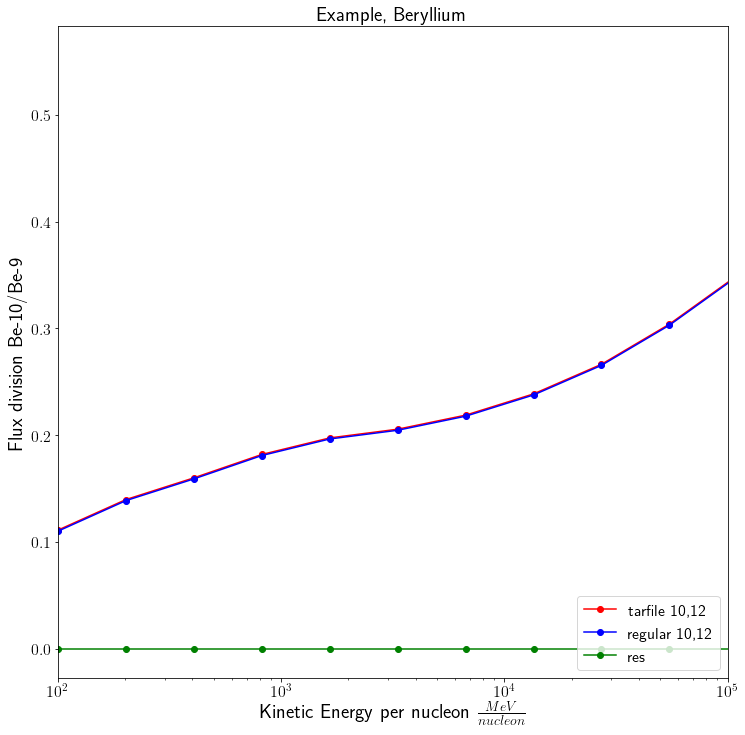

In [47]:
res=be_10_be_9_2-be_10_be_9
fnt=20
x1=10**2
x2=10**5
plt.figure(figsize=(12,12))
plt.plot(energy,be_10_be_9+0.001,'-o',color='red',label="tarfile 10,12")

plt.plot(energy,be_10_be_9_2,'-o',color='blue',label="regular 10,12")
#plt.plot(energy,be_10_be_9,'-o',color='red',label="tarfile")
plt.plot(energy, res, '-o', color='green',label="res")
#plt.plot(energy,be_10_be_9_3,'-o',label="L=3")
#plt.plot(energy,be_10_be_9_4,'-o',label="L=4")
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_tarfile_test.png")
plt.show()

In [18]:
# create a tar file of all the runs in my D drive
# create a new tar file
# make the paths
master_path='D:\\GALPROP\\runs_L_D'
#image_file2= master_path+extension1+extension2
tar = tarfile.open("runs_L_D.tar.gz", "w|gz")
tar.add(master_path)
tar.close()

In [19]:
print("BLAH")

BLAH


In [9]:
tar = tarfile.open("runs_L_D.tar.gz")

In [10]:
list1=tar.getnames()

In [25]:
len(list1)

10501

In [26]:
print(list1)

['GALPROP/runs_L_D', 'GALPROP/runs_L_D/L_10_D_10', 'GALPROP/runs_L_D/L_10_D_10/IC_emiss_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_1_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_2_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_3_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_4_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_5_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_6_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_7_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_8_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_H2R_ring_9_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_HII_ring_1_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_HII_ring_2_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/bremss_HII_ring_3_healpix_56_L_10_D_10.gz', 'GALPROP/runs_L_D/L_10_D_10/br

In [11]:
tar.close()

In [12]:
#open up all the fits files in this tar (thats a lot) and get the relevant data out of it simultaneously?
tar = tarfile.open("runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
k=0
names=[]
FITS_data_full=[]
while k<10:
#while k<len(list_found):
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    fileFITS_data = fits.getdata(open_file)
    print(type(fileFITS_data))
    print(fileFITS_data.shape)
    #FITS_data_full.append(fileFITS_data)
    # append to the arrays we need instead:
    names.append(tar.getmembers()[j].name)
    k+=1
tar.close()
    


GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [9]:
x_loc=24
y_loc=22
z_loc=20
# now all of the isotopes we need to be included are listed below
# note ams proton data includes deuterons which they say are 2% at most at low Rigidity of 1GV and 0.6% at 20GV (cite Battiston 
# https://doi.org/10.1007/s40766-020-00007-2 page 334 "ams_02_2020_paper_cosmic_ray_physics.pdf")
#AMS data on the following ratios (by mass) will be used: 

#p-bar/p +

#p/He ?
#deu/p -
#deu/He -

#He-3/He-4 +

#Li/B +
#Li/C +
#Li/O +

#Be/B +
#Be/C +
#Be/O +

#B/C +
#B/O +

#O/C ??

#voyager data:

#p-bar/p ??
#p/He ??
#deu/p +
#deu/He ??
#He-3/He-4 +
#Li/C ??
#Be/C ??
#B/C +
#Li/O ??
#Be/O ??
#B/O ??
#Be/B ??
#Li/B ??
#O/C ??

#Pamela Data:
# B/C 
# He-3/H3-4 +
# deuterium/protons (H-2/H-1)
# H-2/He-4 (pamela did this)
# protons 

# other experiments:
# Be-10/Be-9 +

# from the machine learning paper
# and we want their fluxes first and take the ratio l8r
sec_proton_loc=7
prim_proton_loc=8
deuterium_loc=9
he3_loc=10
he4_loc=11
li6_loc=12
li7_loc=13
be7_loc=14
be9_loc=15
be10_loc=16
boron10_loc=17
boron11_loc=18
carbon12_loc=19
carbon13_loc=20
oxygen16_loc=23
oxygen17_loc=24
oxygen18_loc=25
element_index=[sec_proton_loc,prim_proton_loc,deuterium_loc,he3_loc,he4_loc,li6_loc,li7_loc,be7_loc,be9_loc,be10_loc,
               boron10_loc,boron11_loc,carbon12_loc,carbon13_loc,oxygen16_loc,oxygen17_loc,oxygen18_loc]
###FLUXES### in order as the elements we have above
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
tar = tarfile.open("runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
k=0
names=[]
FITS_data_full=[]
while k<10:
#while k<len(list_found):
    fluxes_per_element_per_fits_file=[]
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    fileFITS_data = fits.getdata(open_file)
    print(type(fileFITS_data))
    print(fileFITS_data.shape)
    for i in element_index: fluxes_per_element_per_fits_file.append(fileFITS_data[i,:,z_loc,y_loc,x_loc])
    fluxes_per_element_per_fits_file.append(tar.getmembers()[j].name)
    #FITS_data_full.append(fileFITS_data)
    # append to the arrays we need instead:
    names.append(tar.getmembers()[j].name)
    fluxes_per_element_full.append(fluxes_per_element_per_fits_file)
    k+=1
tar.close()


GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [36]:
print("done")
print(len(fluxes_per_element_per_fits_file))

for k in range(10) : print(fluxes_per_element_full[k][-1])
print(type(fluxes_per_element_full))
print(fluxes_per_element_full[2][9])

done
18
GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
<class 'list'>
[1.50134556e-05 8.19352790e-05 3.06643662e-04 7.66328711e-04
 1.34087168e-03 1.75371510e-03 1.71963789e-03 1.32793677e-03
 8.71419150e-04 5.17365406e-04 2.83939793e-04 1.49492975e-04
 7.70399056e-05 3.93296032e-05 2.00073027e-05 1.01366495e-05
 5.11819781e-06 2.57734450e-06 1.29440491e-06 6.48735693e-07
 3.24658998e-07 1.62209787e-07 8.09319474e-08 3.98612485e-08]


In [ ]:
#these are at the position of earth we expect.
x_loc=24
y_loc=22
z_loc=20 #40th for the highest halo size of 4, 30th for halo size of 3
#we can get all the fluxes and then combine them once we have thrown away the memory of the entire fits file?
#or could append as a list of lists?
carbon12_flux_full=[]
carbon13_flux_full=[]
boron11_flux_full=[]
boron10_flux_full=[]
be10_flux_full=[]
be9_flux_full=[]
be7_flux_full=[]
he3_flux_full=[]
he4_flux_full=[]
prim_proton_flux_full=[]
sec_proton_flux_full=[]
deuterium_flux_full=[]
oxygen16_flux_full=[]
oxygen17_flux_full=[]
oxygen18_flux_full=[]
li6_flux_full=[]
li7_flux_full=[]

In [78]:
sec_proton_loc=7
prim_proton_loc=8
deuterium_loc=9
he3_loc=10
he4_loc=11
li6_loc=12
li7_loc=13
be7_loc=14
be9_loc=15
be10_loc=16
boron10_loc=17
boron11_loc=18
carbon12_loc=19
carbon13_loc=20
oxygen16_loc=23
oxygen17_loc=24
oxygen18_loc=25
element_index=[sec_proton_loc,prim_proton_loc,deuterium_loc,he3_loc,he4_loc,li6_loc,li7_loc,be7_loc,be9_loc,be10_loc,
               boron10_loc,boron11_loc,carbon12_loc,carbon13_loc,oxygen16_loc,oxygen17_loc,oxygen18_loc]

In [81]:
for i in element_index: print(i)

7
8
9
10
11
12
13
14
15
16
17
18
19
20
23
24
25


In [45]:
element_index.index(be10_loc)

9

In [1]:
from get_ams_data_functions import *

In [2]:
numerator='B'
denominator='C'
path='C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'
df=read_in_data(numerator,denominator,path)

   R_low  R_high  _B_C_ratio   _stat    _acc    _unf  _scale    _sys
0   1.92    2.15      0.2880  0.0016  0.0151  0.0052  0.0002  0.0160
1   2.15    2.40      0.2947  0.0014  0.0138  0.0031  0.0002  0.0142
2   2.40    2.67      0.3033  0.0013  0.0128  0.0026  0.0002  0.0131
3   2.67    2.97      0.3086  0.0013  0.0118  0.0022  0.0002  0.0120
4   2.97    3.29      0.3173  0.0012  0.0111  0.0019  0.0001  0.0112


In [3]:
rigidity,rigidity_binsize,ratio,ratio_errors=make_energies_and_errors(df,numerator,denominator)

In [4]:
print(rigidity[0])
print(rigidity_binsize[0])
print(ratio[0])
df.tail()

2.035
0.11499999999999999
0.28800000000000003


,R_low,R_high,_B_C_ratio,_stat,_acc,_unf,_scale,_sys
62,441.0,525.0,0.0791,0.0055,0.0025,0.0025,0.0006,0.0036
63,525.0,660.0,0.0810,0.0058,0.0025,0.0031,0.0007,0.0041
64,660.0,880.0,0.0712,0.0060,0.0023,0.0036,0.0007,0.0044
65,880.0,1300.0,0.0733,0.0068,0.0023,0.0053,0.0007,0.0059
66,1300.0,3300.0,0.0446,0.0124,0.0021,0.0032,0.0005,0.0039


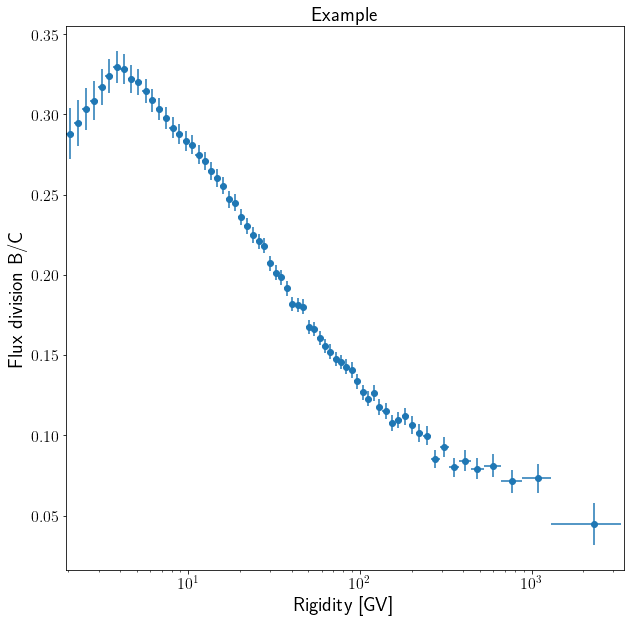

In [7]:
make_plot_of_data(numerator,denominator,rigidity,ratio,rigidity_binsize,ratio_errors,0)

In [4]:
import cosmic_ray_nuclei_index

In [10]:
#paths change when going to unity for all the simulations
# completed the opening of all the fits simulations files from tars in unity. 

In [37]:
###FLUXES### in order as the elements we have above
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
tar = tarfile.open("runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
k=0
names=[]
FITS_data_full=[]
while k<10:
#while k<len(list_found):
    fluxes_per_element_per_fits_file=[]
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    fileFITS_data = fits.getdata(open_file)
    print(type(fileFITS_data))
    print(fileFITS_data.shape)
    for i in cosmic_ray_nuclei_index.element_index: fluxes_per_element_per_fits_file.append(
        fileFITS_data[i,:,cosmic_ray_nuclei_index.z_loc,cosmic_ray_nuclei_index.y_loc,cosmic_ray_nuclei_index.x_loc])
    fluxes_per_element_per_fits_file.append(tar.getmembers()[j].name)
    #FITS_data_full.append(fileFITS_data)
    # append to the arrays we need instead:
    names.append(tar.getmembers()[j].name)
    fluxes_per_element_full.append(fluxes_per_element_per_fits_file)
    k+=1
tar.close()

GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [14]:
for k in range(10) : print(fluxes_per_element_full[k][-1])

GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9


In [19]:
# now once you have full fluxes, need to make the ratios? 
# some are in rigidity and some are in energy.
#Be10/Be9 is kinetic energy
#H2/H1 is kinetic energy
#He3/He4 is kinetic energy
#elemental ratios are rigidity (and pbar p is also rigidity)
# E_kin/nuc = (E-m*c^2)/Nnuc=(gamma*m*c^2-m*c^2)/Nnuc
# Rigidity=p/Ze -> beta*gamma*m*c^2/Ze
# the difference in mass of neutron and mass of proton is 1 MeV/938 MeV or 0.1% so I could be off by 1 MeV*Nneutrons/total mass or still about 0.1 % oh well.


In [5]:
from cosmic_ray_nuclei_index import rigidity_calc, undo_log_energy, log_energy


In [6]:
energy=np.arange(2,9,0.304347391792257)
undo_log_energy(energy)
energy=np.true_divide(energy,10**3)

No handles with labels found to put in legend.


about to make figure for _L_10_D_10
about to make figure for _L_10_D_11
about to make figure for _L_10_D_12
about to make figure for _L_10_D_3
about to make figure for _L_10_D_4
about to make figure for _L_10_D_5
about to make figure for _L_10_D_6
about to make figure for _L_10_D_7
about to make figure for _L_10_D_8
about to make figure for _L_10_D_9


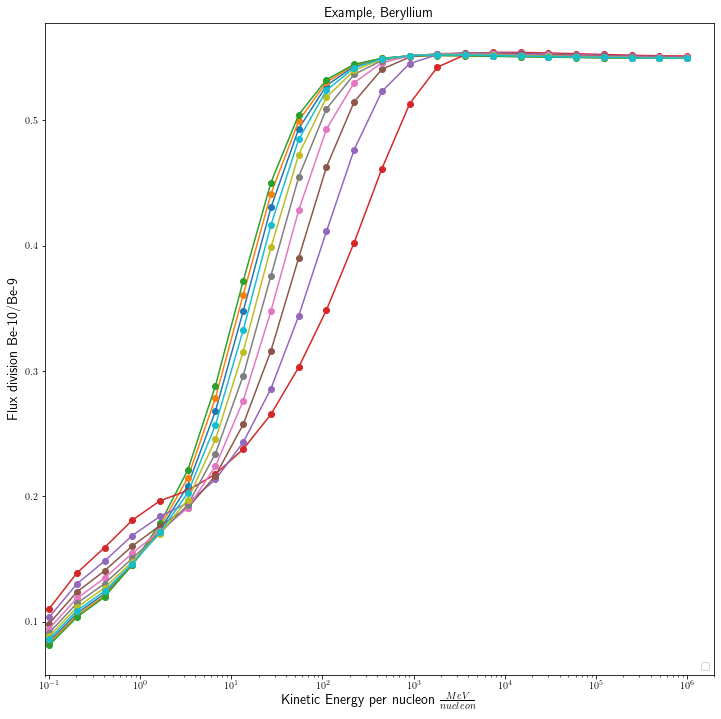

In [21]:
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*10**-1
x2=2*10**6
while model<10:
    be_10_be_9=np.divide(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)])
    name_of_model=str(fluxes_per_element_full[model][-1])
    loc_real_name=name_of_model.find('56')
    real_name=name_of_model[loc_real_name+2:]
    print(f'about to make figure for {real_name}')
    plt.plot(energy,be_10_be_9,'-o',label=str(real_name))
    model+=1
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_tarfile_test"+str(3)+".png")
plt.show()

In [8]:
#now to make it in terms of rigidity, verify the conversion to flux vs rigidity, then do a spline and take ratio and verify this works as well.
# need a rigidity for each isotope.
rig_be_10=rigidity_calc(energy,10,4) # need to make sure energy is not log-energy
rig_be_9=rigidity_calc(energy,9,4)
print(rig_be_10)
print(rig_be_9)
#now take logarithms to do the splines
rig_be_10=log_energy(rig_be_10)
rig_be_9=log_energy(rig_be_9)
print(rig_be_10)
print(rig_be_9)


[1.11130554e+00 1.61766180e+00 2.40691212e+00 3.71281883e+00
 6.02911913e+00 1.03952379e+01 1.89508328e+01 3.60263759e+01
 7.03388463e+01 1.39434463e+02 2.78656155e+02 5.59219696e+02
 1.12464190e+03 2.26415369e+03 4.56065058e+03 9.18886175e+03
 1.85162604e+04 3.73140992e+04 7.51980544e+04 1.51546940e+05
 3.05415574e+05 6.15512520e+05 1.24046196e+06 2.49994485e+06]
[1.00017498e+00 1.45589562e+00 2.16622091e+00 3.34153695e+00
 5.42620722e+00 9.35571413e+00 1.70557495e+01 3.24237383e+01
 6.33049616e+01 1.25491016e+02 2.50790540e+02 5.03297726e+02
 1.01217771e+03 2.03773832e+03 4.10458552e+03 8.26997558e+03
 1.66646343e+04 3.35826893e+04 6.76782489e+04 1.36392246e+05
 2.74874017e+05 5.53961268e+05 1.11641576e+06 2.24995036e+06]
[0.04583348 0.20888773 0.38146023 0.56970376 0.78025387 1.01683443
 1.2776283  1.55662058 1.84719524 2.14437013 2.44506864 2.74758246
 3.05101426 3.3549059  3.6590268  3.96326172 4.26755328 4.57187296
 4.8762066  5.18054717 5.48489118 5.78923689 6.09358345 6.3979304

In [24]:
# now need to find the lowest rigidity and highest rigidity that can be splined. This means the second lowest and second highest (so that both splines are only fitting inside of the data).
# just compare the last elements and the first elements. 
def find_second_max_min(x_1,x_2):
    if x_1[0] < x_2[0]: # these are finding the second lowest value (not the actual minimum)
        minimum=x_2[0]
    else:
        minimum=x_1[0]
    if x_1[-1]> x_2[-1]: # find the second highest value.
        maximum=x_2[-1]
    else:
        maximum=x_1[-1]
    return minimum, maximum

In [25]:
from get_splines import *

In [31]:
min_R,max_R=find_second_max_min(rig_be_10,rig_be_9)
model=0
rig_be_9_spline, flux_be_9_spline=spline(rig_be_9,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)], 200,min_R,max_R)
rig_be_10_spline, flux_be_10_spline=spline(rig_be_10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)], 200,min_R,max_R)

In [ ]:
# try taking the log of the fluxes and splining as well. 

In [34]:
log_Be_10_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)])

In [39]:
print(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)])
print(log_Be_10_flux)

[1.7467349e-04 7.6408178e-04 2.5424557e-03 5.4137204e-03 7.9757199e-03
 8.5689509e-03 6.4983657e-03 3.9009044e-03 2.1053781e-03 1.1098237e-03
 5.7537004e-04 2.9575155e-04 1.5105722e-04 7.6909608e-05 3.9145132e-05
 1.9863821e-05 1.0046597e-05 5.0674803e-06 2.5492554e-06 1.2793372e-06
 6.4088613e-07 3.2057380e-07 1.6007873e-07 7.8783934e-08]
[-3.757773  -3.1168602 -2.5947466 -2.2665043 -2.0982301 -2.0670724
 -2.1871958 -2.4088347 -2.6766698 -2.954746  -3.2400527 -3.529073
 -3.8208585 -4.1140194 -4.4073224 -4.701937  -4.997981  -5.295208
 -5.5935864 -5.893015  -6.193219  -6.494072  -6.795666  -7.1035624]


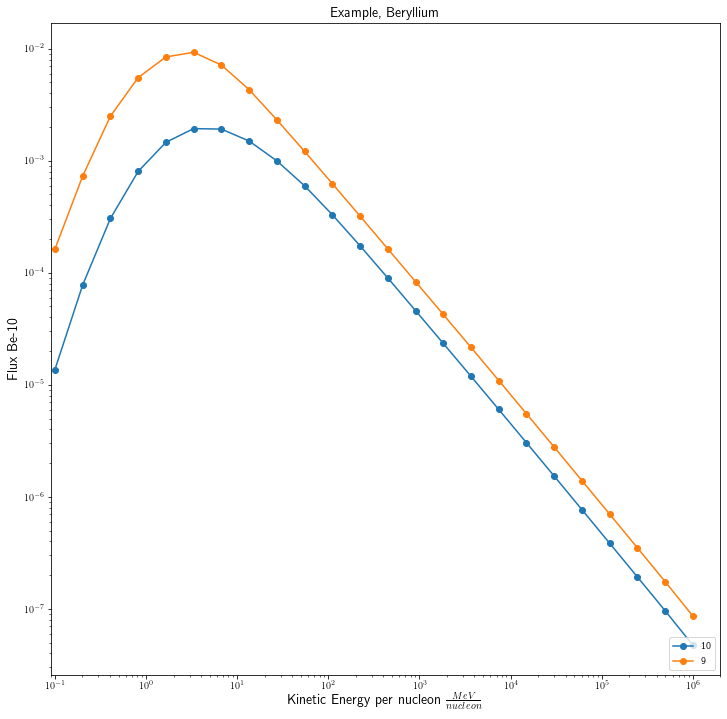

In [43]:
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*10**-1
x2=2*10**6
plt.plot(energy,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'-o',label="10")
plt.plot(energy,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'-o',label="9")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux Be-10",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_10_flux.png")
plt.show()

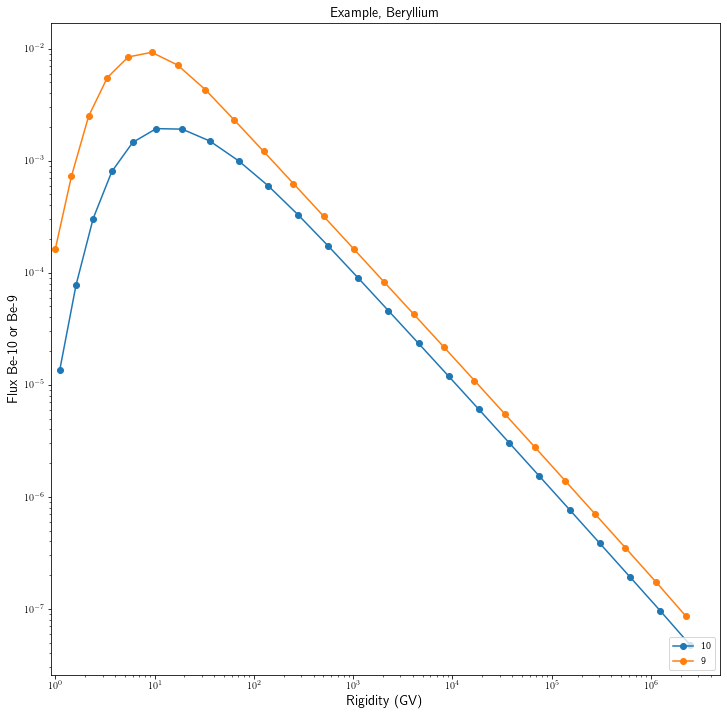

In [45]:
rig_be_10=rigidity_calc(energy,10,4) # need to make sure energy is not log-energy
rig_be_9=rigidity_calc(energy,9,4)
plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*rig_be_9[0]
x2=2*rig_be_10[-1]
plt.plot(rig_be_10,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],'-o',label="10")
plt.plot(rig_be_9,fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)],'-o',label="9")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux Be-10 or Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_10_flux_rigidity.png")
plt.show()

In [30]:
print(min_R)
print(max_R)

0.04583347879784221
6.35217293671049


In [32]:
Be_10_9_ratio_spline=np.divide(flux_be_10_spline,flux_be_9_spline)

No handles with labels found to put in legend.


about to make figure for _L_10_D_10


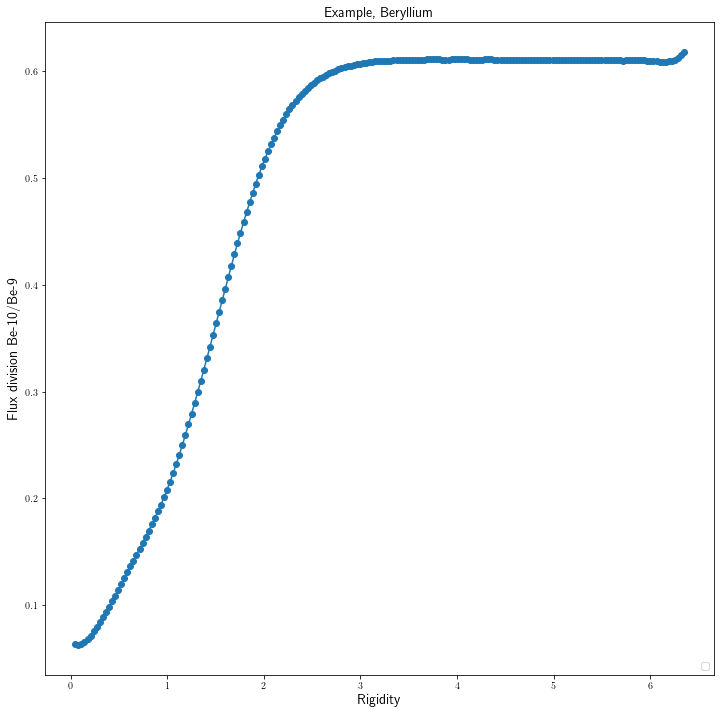

In [33]:

plt.figure(figsize=(12,12))
model=0
fnt=14
x1=0.9*10**-1
x2=2*10**6
while model<1:
    be_10_be_9=Be_10_9_ratio_spline
    name_of_model=str(fluxes_per_element_full[model][-1])
    loc_real_name=name_of_model.find('56')
    real_name=name_of_model[loc_real_name+2:]
    print(f'about to make figure for {real_name}')
    plt.plot(rig_be_9_spline,be_10_be_9,'-o',label=str(real_name))
    model+=1
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
#plt.xscale("log")
plt.xlabel("Rigidity",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_spline_test"+str(3)+".png")
plt.show()

In [11]:
from scipy.interpolate import splev, splrep

In [ ]:
# now do an interpolation on one of these models?
energy_1=np.arange(0,7,0.304347391792257)+2
ams_energy_mp_1=np.log10(ams_energy_mp)
L_val=10
D_val=12
spl = splrep(energy_1,He_3_He_4_full[D_val-3][L_val-1])
energy_cont = np.linspace(2, 7, 2000)
He_3_He_4_spline = splev(energy_cont, spl)